#### Dataset Attributes:

* CustomerID : Unique ID assigned to the customer
* Gender : Gender of the customer
* Age : Age of the customer
* Annual Income (k$) : Annual Income of the customer
* Spending Score (1-1000) : Score assigned by the mall based on customer behavior and spending nature

### Importing Liabraries:

In [500]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [501]:
df = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Preprocessing:

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [503]:
# find rows and column of dataset
df.shape

(200, 5)

In [504]:
# data columns
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [505]:
# find null values in data
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [506]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [507]:
# Rename Data Columns
df.columns = ['CustomerID','Gender','Age','Annual_Income_(k$)', 'Spending_Score_(1-100)']

In [508]:
df.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploratory Data Analysis:

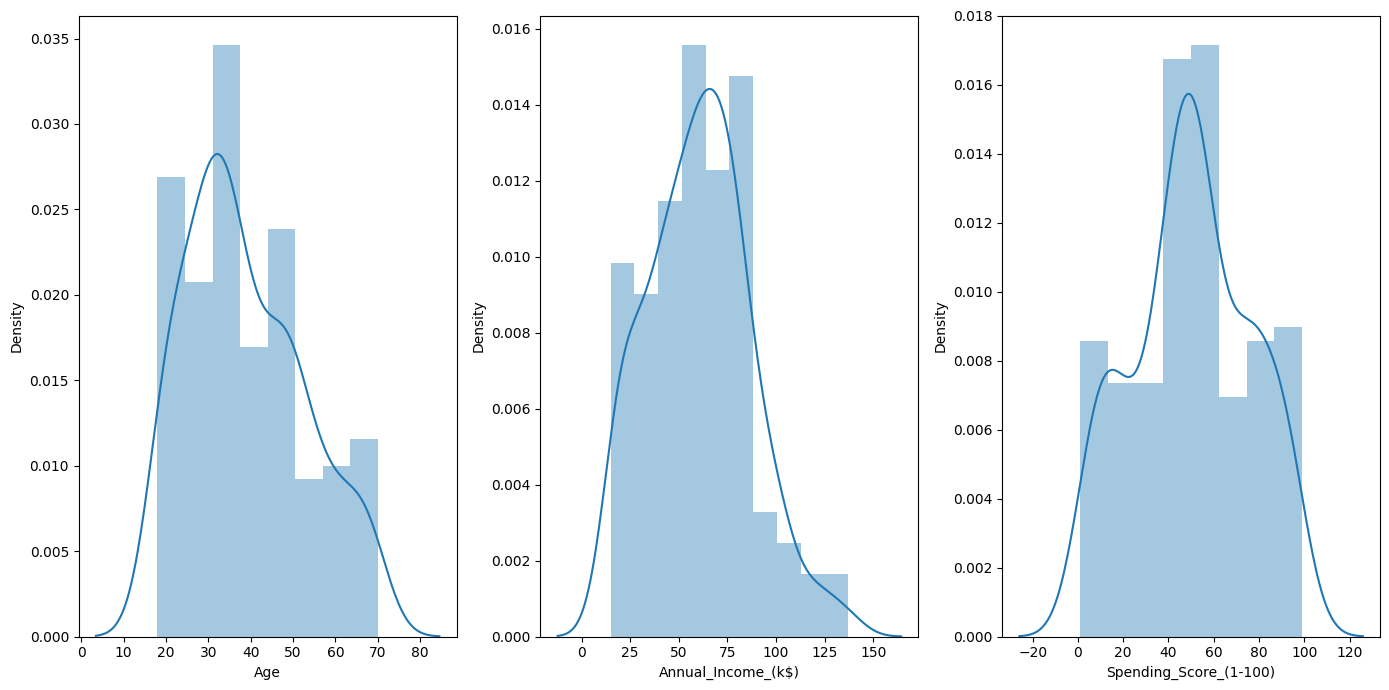

In [509]:
# Distribution plot 
plt.figure(figsize = (14,7))

plt_num = 1

for col in ['Age','Annual_Income_(k$)','Spending_Score_(1-100)']:
    if plt_num <=3:
        ax = plt.subplot(1,3,plt_num)
        sns.distplot(df[col])
    plt_num +=1
plt.tight_layout()   
plt.show()
    

* Age group near 30-40 have the highest density.
* Most customers have income in range of 50-80k.
* Most of the customers have spending score of 50.

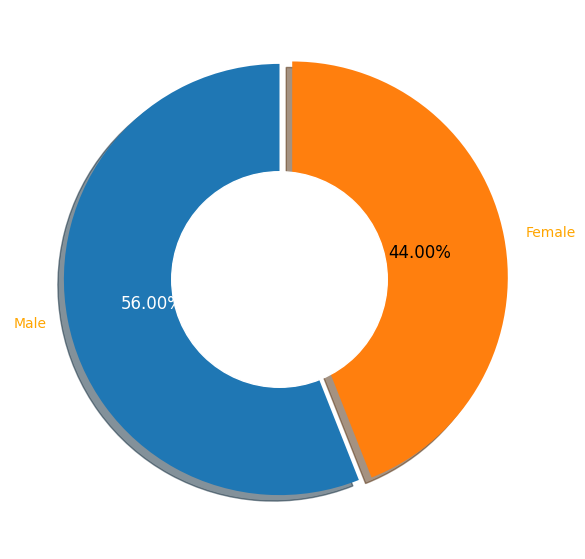

In [510]:
# Donut chart of Gender Column
values = df['Gender'].value_counts()
labels = ['Male', 'Female']

fig, ax = plt.subplots(figsize = (14, 7), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'orange')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')


centre_circle = plt.Circle((0,0), 0.5, color='white')
fig.gca().add_artist(centre_circle)

plt.show()


There are 44% customers that are female and 56% that are male.

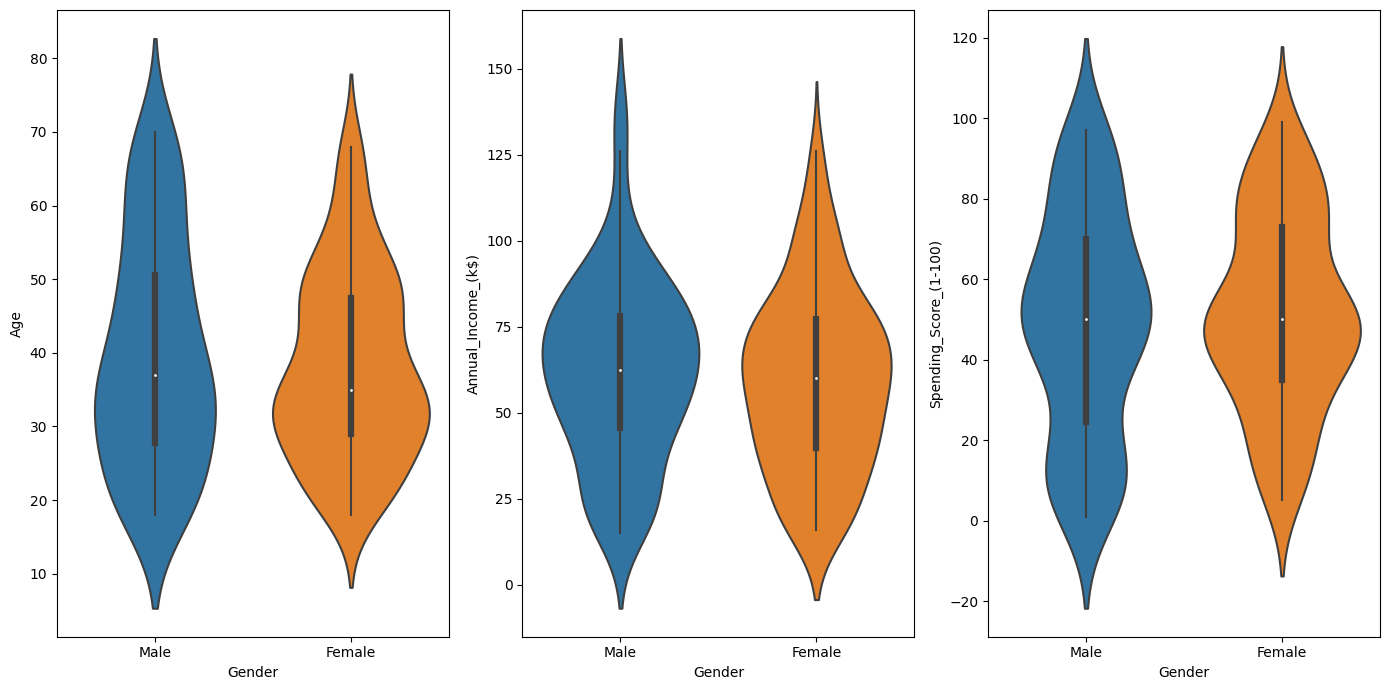

In [511]:
# Violin plot 
plt.figure(figsize = (14,7))

plt_num = 1

for col in ['Age','Annual_Income_(k$)','Spending_Score_(1-100)']:
    if plt_num <=3:
        ax = plt.subplot(1,3,plt_num)
        sns.violinplot(x = 'Gender', y = col, data = df)
        
    plt_num +=1
plt.tight_layout()   
plt.show()

* The age range of female customers is from 30 to just below 50, whereas the age range of male customers is from just below 30 to 50. 
* For annual income, female customers’ income starts from 40k, whereas male customer's is above this value. 
* The median spending score (1-100) of both genders is the same.

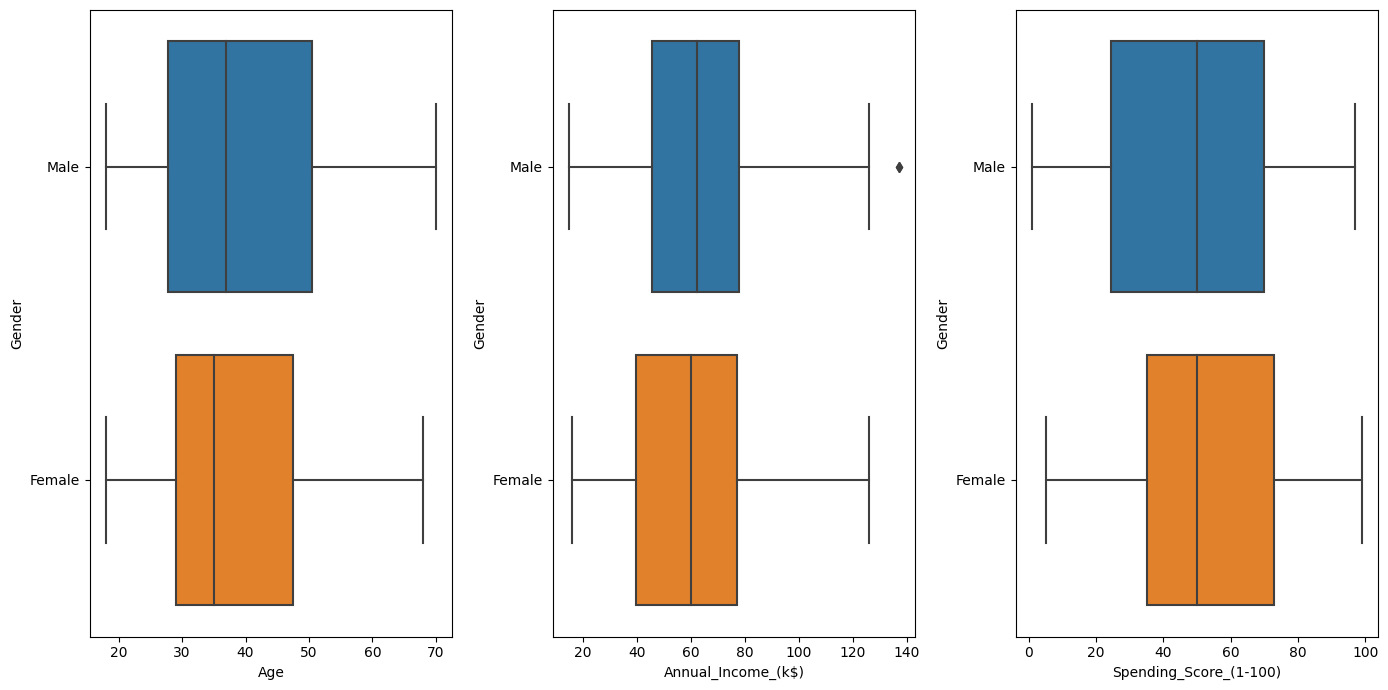

In [512]:
# boxplot plot 
plt.figure(figsize = (14,7))

plt_num = 1

for col in ['Age','Annual_Income_(k$)','Spending_Score_(1-100)']:
    if plt_num <=3:
        ax = plt.subplot(1,3,plt_num)
        sns.boxplot(x = col, y = 'Gender', data = df)
    plt_num +=1

plt.tight_layout()   
plt.show()

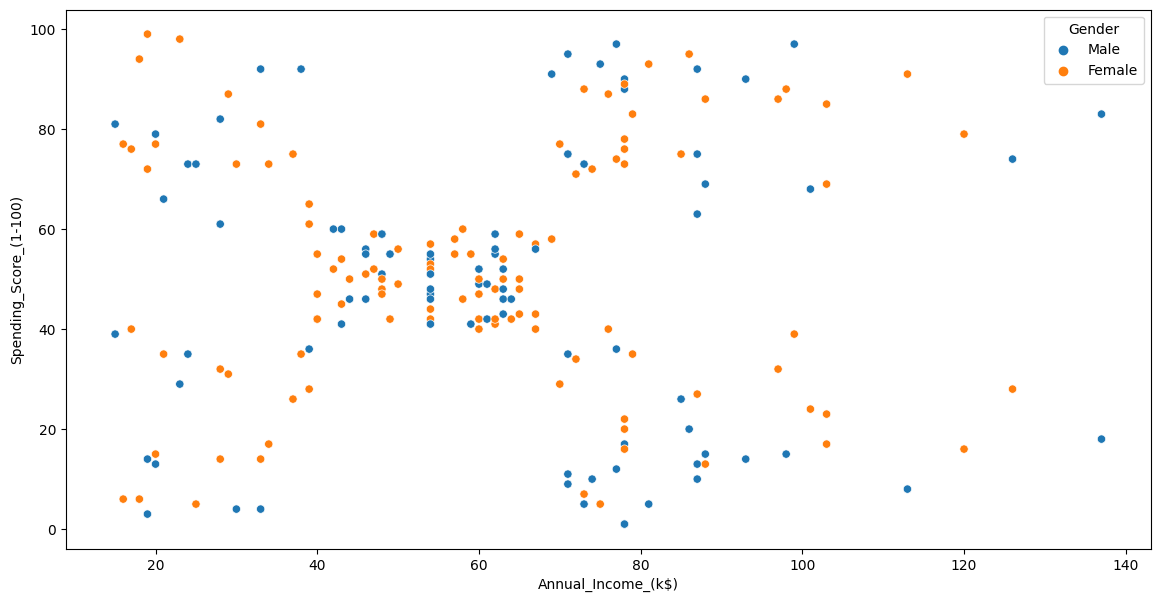

In [513]:
# Scatter Plot
plt.figure(figsize = (14,7))

sns.scatterplot(x = 'Annual_Income_(k$)', y = 'Spending_Score_(1-100)', data = df, hue = 'Gender')
plt.show()

There is no significant difference between male and female annual income vs spending score.

### Model Building:

#### 1. kmeans clustering using `Spending Score` and `Annual Income` columns:

#### Elbow Plot:

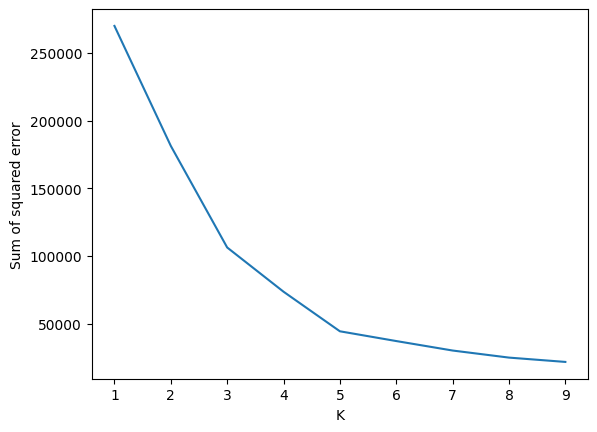

In [514]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Spending_Score_(1-100)','Annual_Income_(k$)']])
    sse.append(km.inertia_)
    plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

We are going to use 5 clusters considering Elbow Plot

In [515]:
km = KMeans(n_clusters = 5)
y_predicted = km.fit_predict(df[['Spending_Score_(1-100)','Annual_Income_(k$)']])
y_predicted

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

We are using kMeans algorthms to cluster our data


In [516]:
df['cluster']=y_predicted
df.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


Created cluster column to store predicted cluster for each row.

In [517]:
km.cluster_centers_

array([[17.11428571, 88.2       ],
       [79.36363636, 25.72727273],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ]])

find center point of each cluster

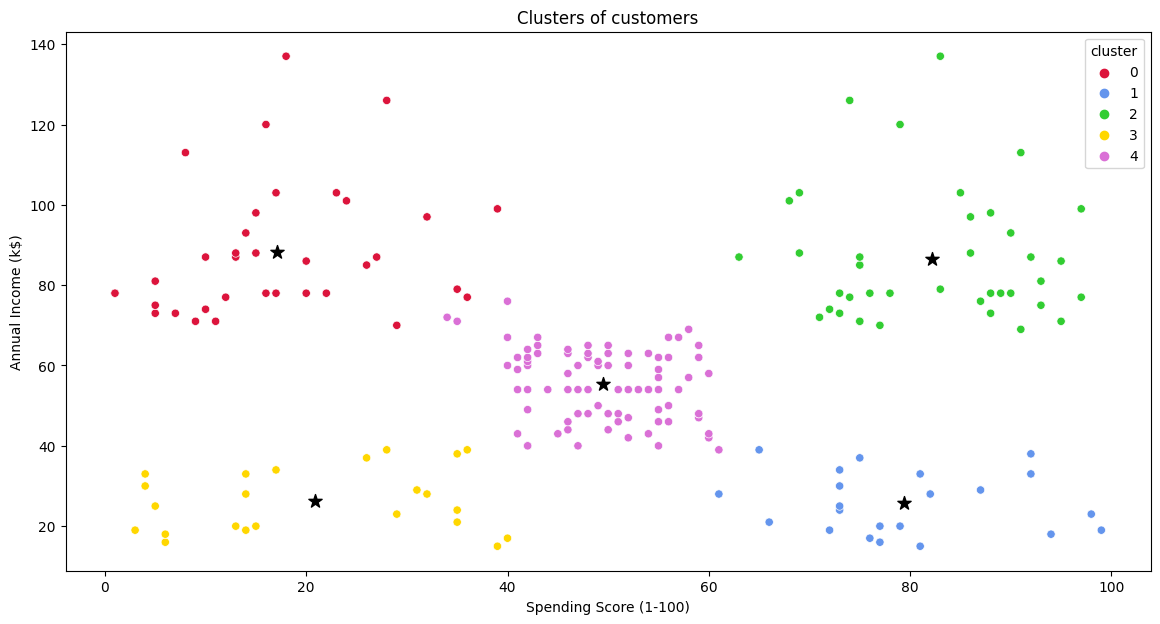

In [518]:
plt.figure(figsize = (14,7))

colors = ['#DC143C', '#6495ED', '#32CD32', '#FFD700', '#DA70D6']

sns.scatterplot(data=df, x='Spending_Score_(1-100)', y='Annual_Income_(k$)', hue='cluster', palette=colors)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*', s=100, c='black',label='centroid')
plt.title('Clusters of customers')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()


#### 2. kmeans clustering using `Spending Score` and `Age':

#### Elbow Plot:

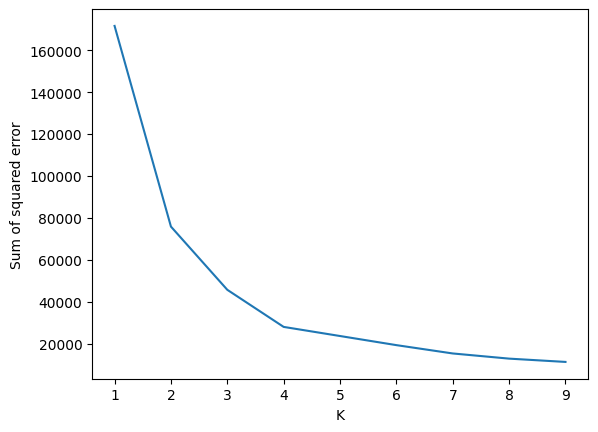

In [519]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Spending_Score_(1-100)','Age']])
    sse.append(km.inertia_)
    plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

We are going to use 4 clusters considering Elbow Plot

In [520]:
km = KMeans(n_clusters = 4)
y_predicted = km.fit_predict(df[['Spending_Score_(1-100)','Age']])
y_predicted

array([2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0,
       1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 2,
       1, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 0, 3, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [521]:
df['cluster'] = y_predicted
df.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2


In [522]:
km.cluster_centers_

array([[82.35087719, 30.1754386 ],
       [15.02083333, 43.29166667],
       [49.14893617, 27.61702128],
       [48.22916667, 55.70833333]])

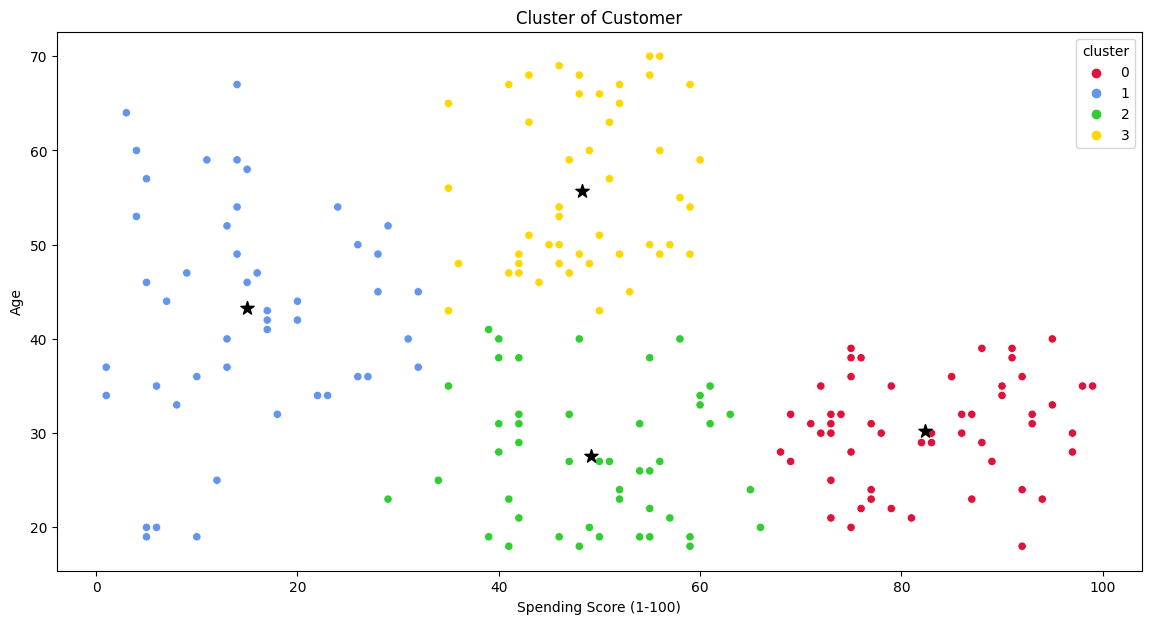

In [523]:
plt.figure(figsize = (14,7))

colors = ['#DC143C', '#6495ED', '#32CD32', '#FFD700']

sns.scatterplot(data = df, x = 'Spending_Score_(1-100)', y = 'Age', hue = 'cluster', palette = colors)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], marker = '*', s = 100, c = 'black', label = 'centroid')
plt.title('Cluster of Customer')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.show()
